In [ ]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = "D:\\Anaconda3\\Library\\share";
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import xlrd
from pylab import *
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend_handler import HandlerLine2D

from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, interplevel

In [ ]:
file1 = Dataset("wrfout_d02_YSU")
file2 = Dataset("wrfout_d02_UW")
file3 = Dataset("wrfout_d02_acm2")

In [ ]:
file3.variables

{'Times': <class 'netCDF4._netCDF4.Variable'>
 |S1 Times(Time, DateStrLen)
 unlimited dimensions: Time
 current shape = (73, 19)
 filling on, default _FillValue of   used,
 'XLAT': <class 'netCDF4._netCDF4.Variable'>
 float32 XLAT(Time, south_north, west_east)
     FieldType: 104
     MemoryOrder: XY 
     description: LATITUDE, SOUTH IS NEGATIVE
     units: degree_north
     stagger: 
     coordinates: XLONG XLAT
 unlimited dimensions: Time
 current shape = (73, 51, 57)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'XLONG': <class 'netCDF4._netCDF4.Variable'>
 float32 XLONG(Time, south_north, west_east)
     FieldType: 104
     MemoryOrder: XY 
     description: LONGITUDE, WEST IS NEGATIVE
     units: degree_east
     stagger: 
     coordinates: XLONG XLAT
 unlimited dimensions: Time
 current shape = (73, 51, 57)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'LU_INDEX': <class 'netCDF4._netCDF4.Variable'>
 float32 LU_INDEX(Time, south_north, west_ea

# PBLH

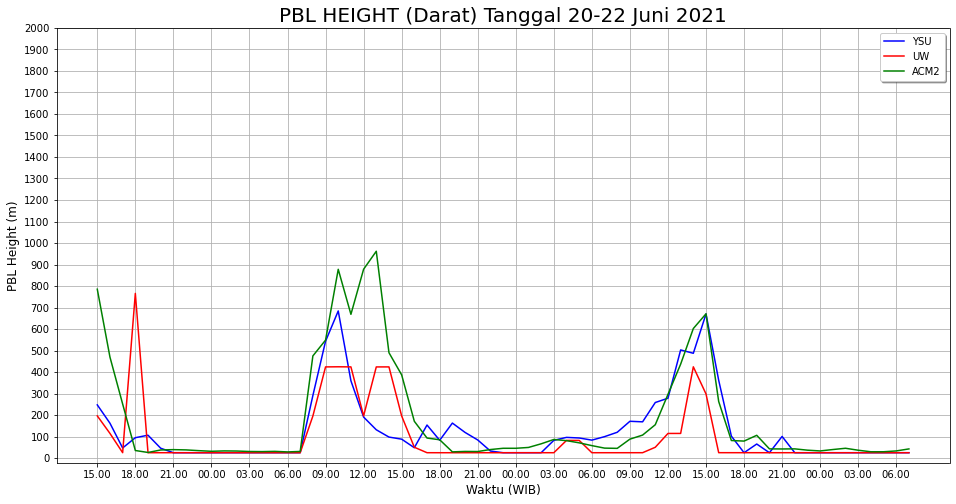

In [ ]:
pblh1 = file1.variables["PBLH"][8:73,25,26]
pblh2 = file2.variables["PBLH"][8:73,25,26]
pblh3 = file3.variables["PBLH"][8:73,25,26]

fig = plt.figure(figsize=(16,8))
plt.plot(pblh1, color='b', linewidth=1.5)
plt.plot(pblh2, color='r', linewidth=1.5)
plt.plot(pblh3, color='g', linewidth=1.5)

plt.title("PBL HEIGHT (Darat) Tanggal 20-22 Juni 2021", fontsize='20')
plt.ylabel("PBL Height (m)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])
plt.legend(['YSU', 'UW', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('PBLH-darat')

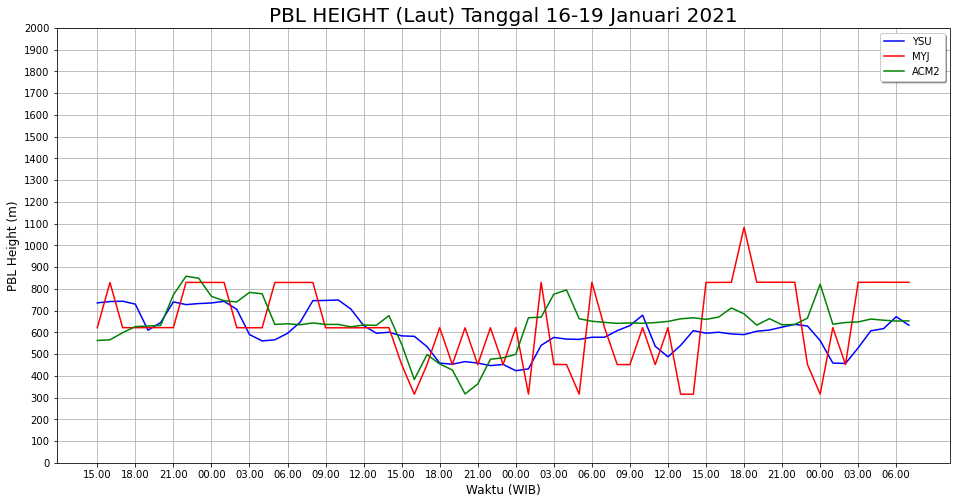

In [ ]:
pblh1 = file1.variables["PBLH"][8:73,42,55]
pblh2 = file2.variables["PBLH"][8:73,42,55]
pblh3 = file3.variables["PBLH"][8:73,42,55]

fig = plt.figure(figsize=(16,8))
plt.plot(pblh1, color='b', linewidth=1.5)
plt.plot(pblh2, color='r', linewidth=1.5)
plt.plot(pblh3, color='g', linewidth=1.5)

plt.title("PBL HEIGHT (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("PBL Height (m)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])
plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('PBLH-laut')

## Sensible Heat Flux (HFX)

In [ ]:
hfx1 = file1.variables["HFX"][8:73,25,26]
hfx2 = file2.variables["HFX"][8:73,25,26]
hfx3 = file3.variables["HFX"][8:73,25,26]

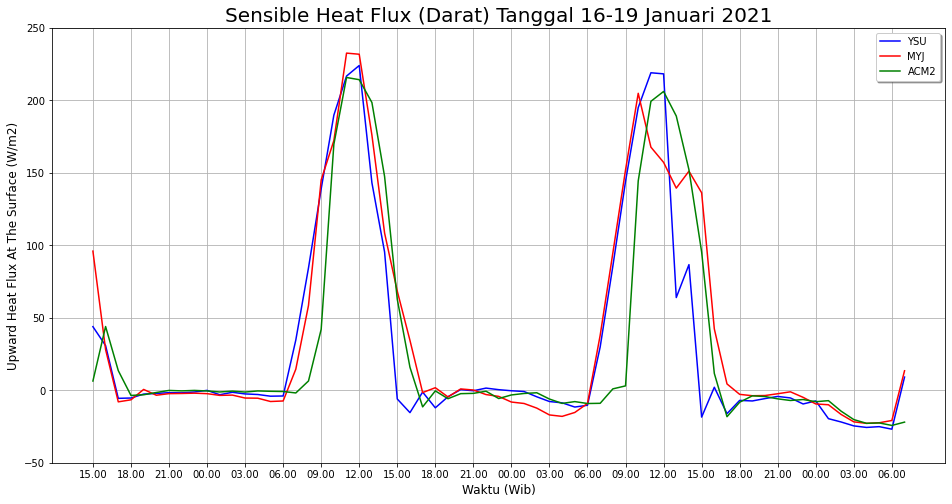

In [ ]:
fig = plt.figure(figsize=(16,8))

plt.plot(hfx1, color='b', linewidth=1.5)
plt.plot(hfx2, color='r', linewidth=1.5)
plt.plot(hfx3, color='g', linewidth=1.5)

plt.title("Sensible Heat Flux (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Upward Heat Flux At The Surface (W/m2)", fontsize='12')
plt.xlabel("Waktu (Wib)", fontsize='12')
plt.yticks([-50,0,50,100,150,200,250])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])
plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('HFX-darat')

In [ ]:
hfx1 = file1.variables["HFX"][8:73,42,55]
hfx2 = file2.variables["HFX"][8:73,42,55]
hfx3 = file3.variables["HFX"][8:73,42,55]

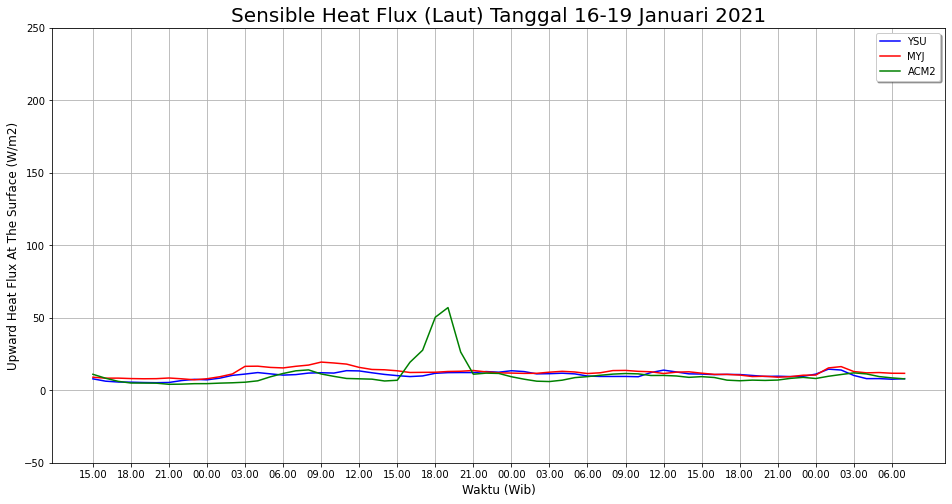

In [ ]:
fig = plt.figure(figsize=(16,8))

plt.plot(hfx1, color='b', linewidth=1.5)
plt.plot(hfx2, color='r', linewidth=1.5)
plt.plot(hfx3, color='g', linewidth=1.5)

plt.title("Sensible Heat Flux (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Upward Heat Flux At The Surface (W/m2)", fontsize='12')
plt.xlabel("Waktu (Wib)", fontsize='12')
plt.yticks([-50,0,50,100,150,200,250])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])
plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('HFX-laut')

## Latent Heat Flux (LH) 

In [ ]:
lh1 = file1.variables["LH"][8:73,25,26]
lh2 = file2.variables["LH"][8:73,25,26]
lh3 = file3.variables["LH"][8:73,25,26]

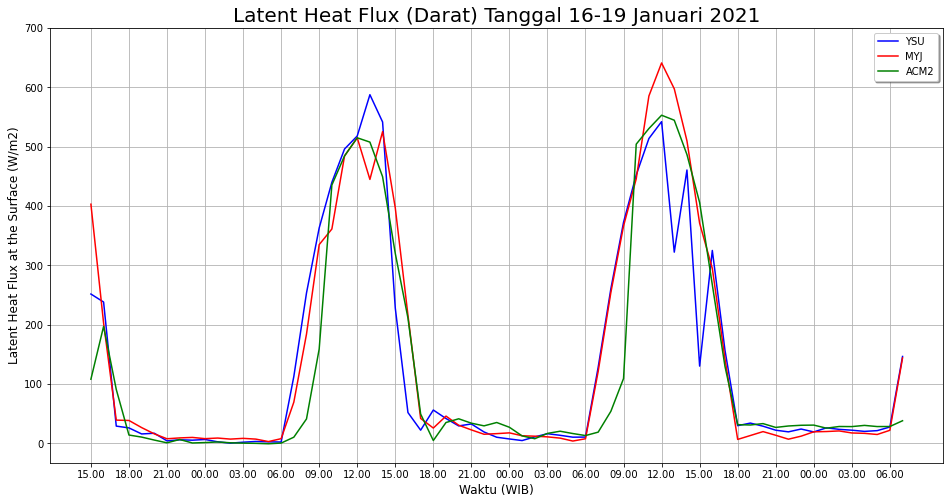

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(lh1, color='b', linewidth=1.5)
plt.plot(lh2, color='r', linewidth=1.5)
plt.plot(lh3, color='g', linewidth=1.5)

plt.title("Latent Heat Flux (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Latent Heat Flux at the Surface (W/m2)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([0,100,200,300,400,500,600,700])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('LH-darat')

In [ ]:
lh1 = file1.variables["LH"][8:73,42,55]
lh2 = file2.variables["LH"][8:73,42,55]
lh3 = file3.variables["LH"][8:73,42,55]

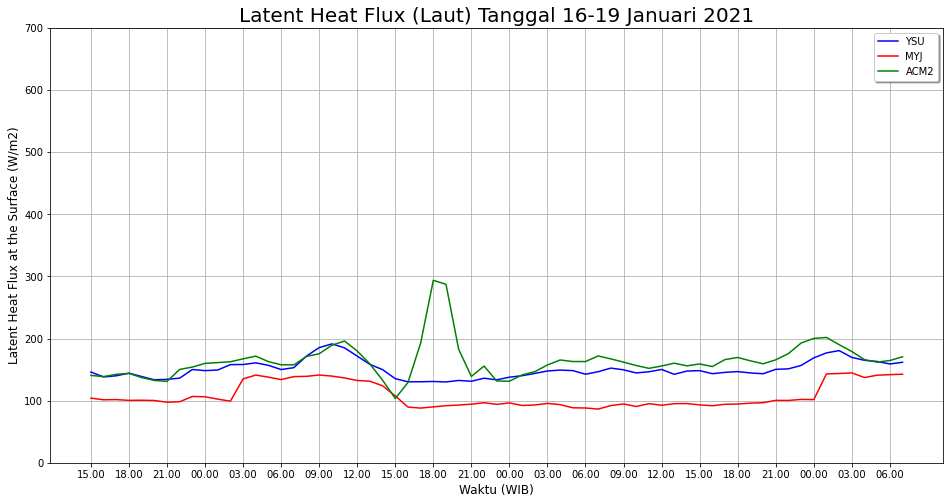

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(lh1, color='b', linewidth=1.5)
plt.plot(lh2, color='r', linewidth=1.5)
plt.plot(lh3, color='g', linewidth=1.5)

plt.title("Latent Heat Flux (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Latent Heat Flux at the Surface (W/m2)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([0,100,200,300,400,500,600,700])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('LH-laut')

## DOWNWARD SHORTWAVE

In [ ]:
qfx1 = file1.variables["SWDOWN"][8:73,25,26]
qfx2 = file2.variables["SWDOWN"][8:73,25,26]
qfx3 = file3.variables["SWDOWN"][8:73,25,26]

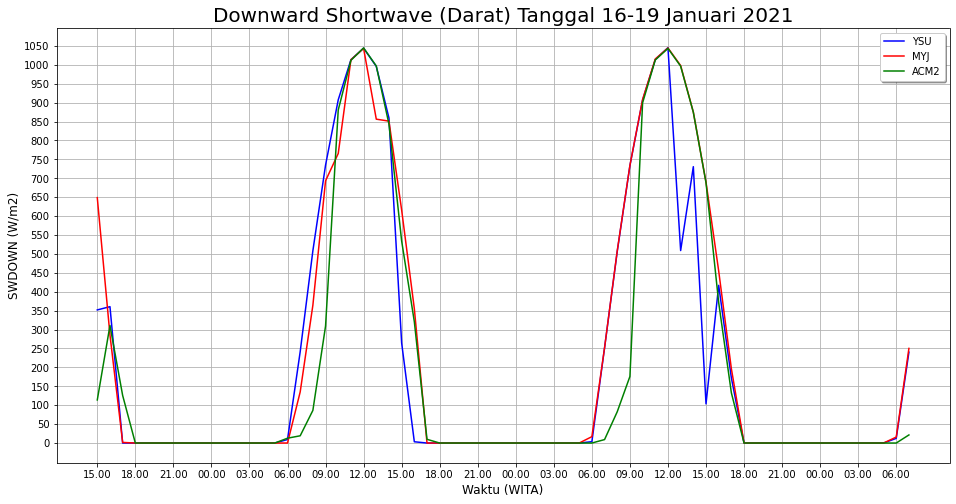

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(qfx1, color='b', linewidth=1.5)
plt.plot(qfx2, color='r', linewidth=1.5)
plt.plot(qfx3, color='g', linewidth=1.5)

plt.title("Downward Shortwave (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("SWDOWN (W/m2)", fontsize='12')
plt.xlabel("Waktu (WITA)", fontsize='12')
plt.yticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('SWDOWN-darat')

In [ ]:
qfx1 = file1.variables["SWDOWN"][8:73,42,55]
qfx2 = file2.variables["SWDOWN"][8:73,42,55]
qfx3 = file3.variables["SWDOWN"][8:73,42,55]

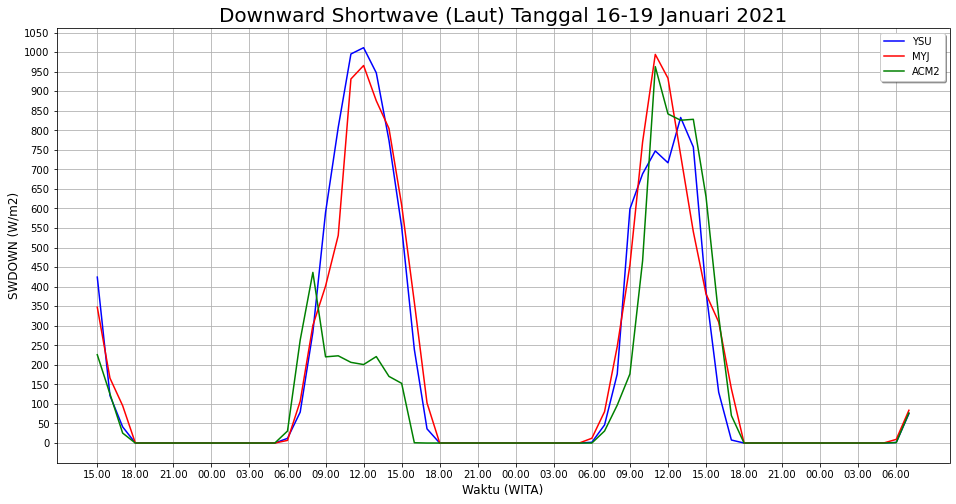

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(qfx1, color='b', linewidth=1.5)
plt.plot(qfx2, color='r', linewidth=1.5)
plt.plot(qfx3, color='g', linewidth=1.5)

plt.title("Downward Shortwave (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("SWDOWN (W/m2)", fontsize='12')
plt.xlabel("Waktu (WITA)", fontsize='12')
plt.yticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('SWDOWN-laut')

## DOWNWARD LONGWAVE

In [ ]:
qfx1 = file1.variables["GLW"][8:73,25,26]
qfx2 = file2.variables["GLW"][8:73,25,26]
qfx3 = file3.variables["GLW"][8:73,25,26]

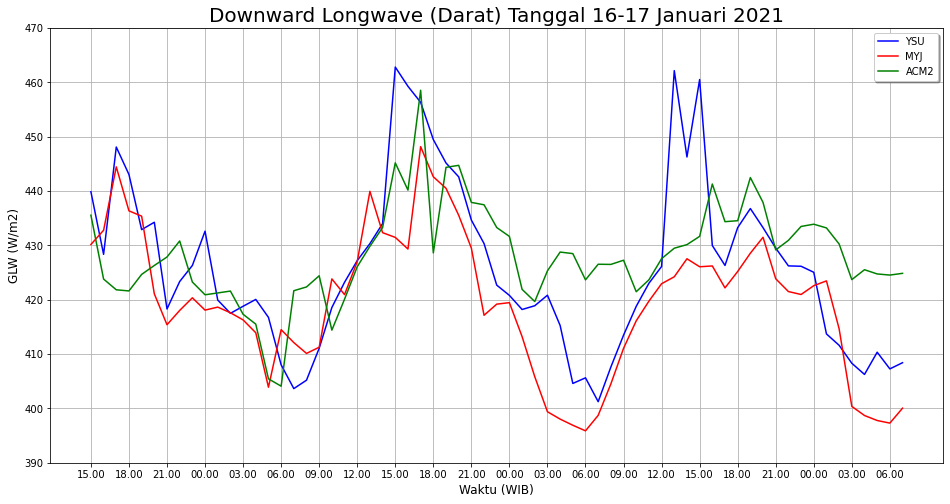

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(qfx1, color='b', linewidth=1.5)
plt.plot(qfx2, color='r', linewidth=1.5)
plt.plot(qfx3, color='g', linewidth=1.5)

plt.title("Downward Longwave (Darat) Tanggal 16-17 Januari 2021", fontsize='20')
plt.ylabel("GLW (W/m2)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([390,400,410,420,430,440,450,460,470])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('GLW-darat')

In [ ]:
qfx1 = file1.variables["GLW"][8:73,42,55]
qfx2 = file2.variables["GLW"][8:73,42,55]
qfx3 = file3.variables["GLW"][8:73,42,55]

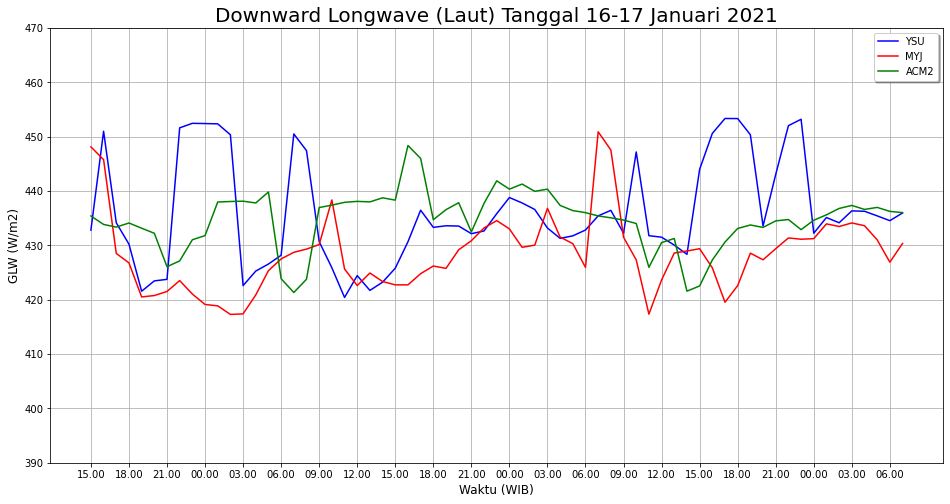

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(qfx1, color='b', linewidth=1.5)
plt.plot(qfx2, color='r', linewidth=1.5)
plt.plot(qfx3, color='g', linewidth=1.5)

plt.title("Downward Longwave (Laut) Tanggal 16-17 Januari 2021", fontsize='20')
plt.ylabel("GLW (W/m2)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([390,400,410,420,430,440,450,460,470])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('GLW-laut')

# OLR

In [ ]:
OLR1 = file1.variables["OLR"][8:73,25,26]
OLR2 = file2.variables["OLR"][8:73,25,26]
OLR3 = file3.variables["OLR"][8:73,25,26]

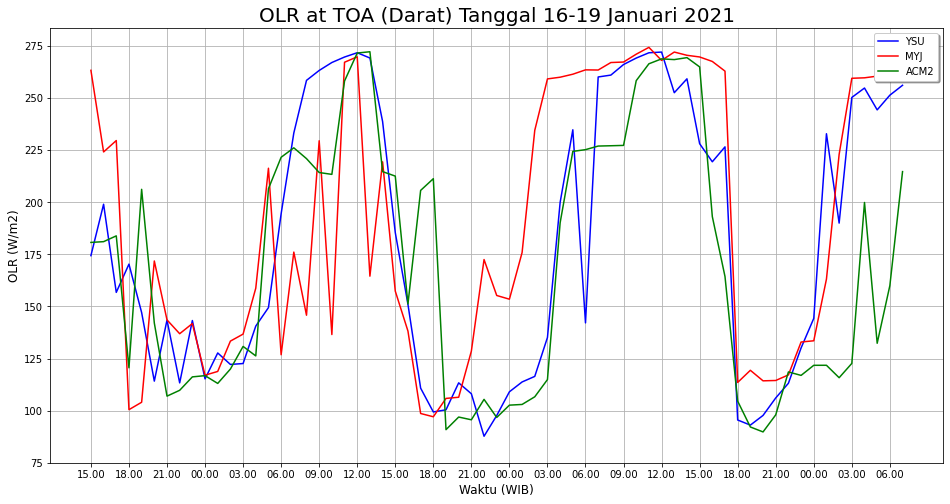

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(OLR1, color='b', linewidth=1.5)
plt.plot(OLR2, color='r', linewidth=1.5)
plt.plot(OLR3, color='g', linewidth=1.5)

plt.title("OLR at TOA (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("OLR (W/m2)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([75,100,125,150,175,200,225,250,275])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('OLR-darat')

In [ ]:
OLR1 = file1.variables["OLR"][8:73,42,55]
OLR2 = file2.variables["OLR"][8:73,42,55]
OLR3 = file3.variables["OLR"][8:73,42,55]

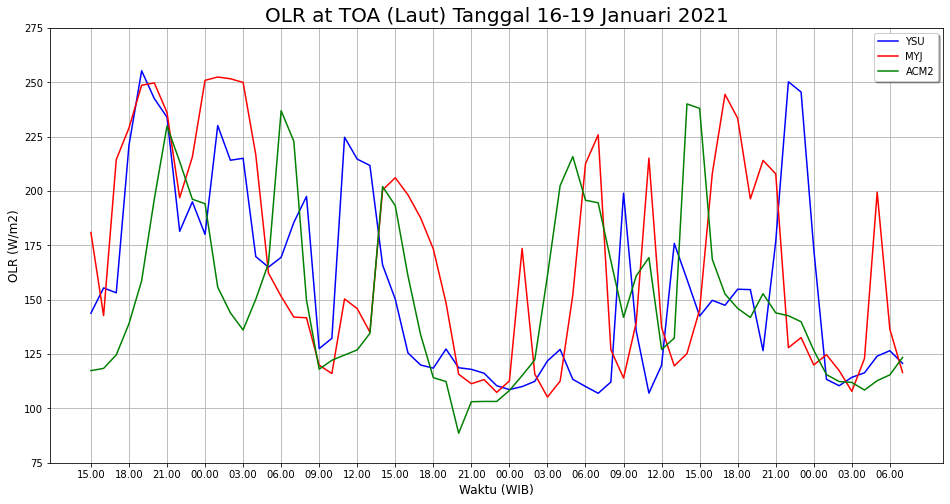

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(OLR1, color='b', linewidth=1.5)
plt.plot(OLR2, color='r', linewidth=1.5)
plt.plot(OLR3, color='g', linewidth=1.5)

plt.title("OLR at TOA (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("OLR (W/m2)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([75,100,125,150,175,200,225,250,275])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('OLR-laut')

# Temperatur

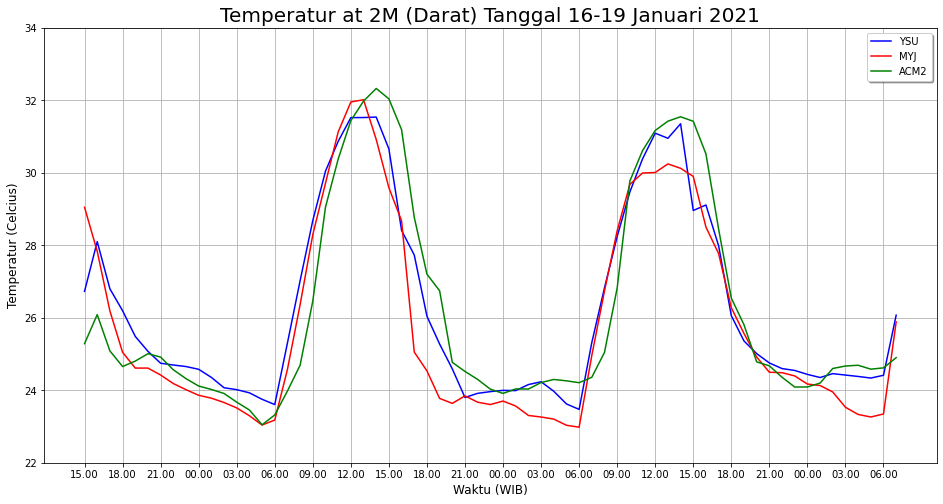

In [ ]:
t1 = file1.variables["T2"][8:73,25,26]-273.15
t2 = file2.variables["T2"][8:73,25,26]-273.15
t3 = file3.variables["T2"][8:73,25,26]-273.15
fig = plt.figure(figsize=(16,8))
plt.plot(t1, color='b', linewidth=1.5)
plt.plot(t2, color='r', linewidth=1.5)
plt.plot(t3, color='g', linewidth=1.5)

plt.title("Temperatur at 2M (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Temperatur (Celcius)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([22,24,26,28,30,32,34])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('Temp-darat')

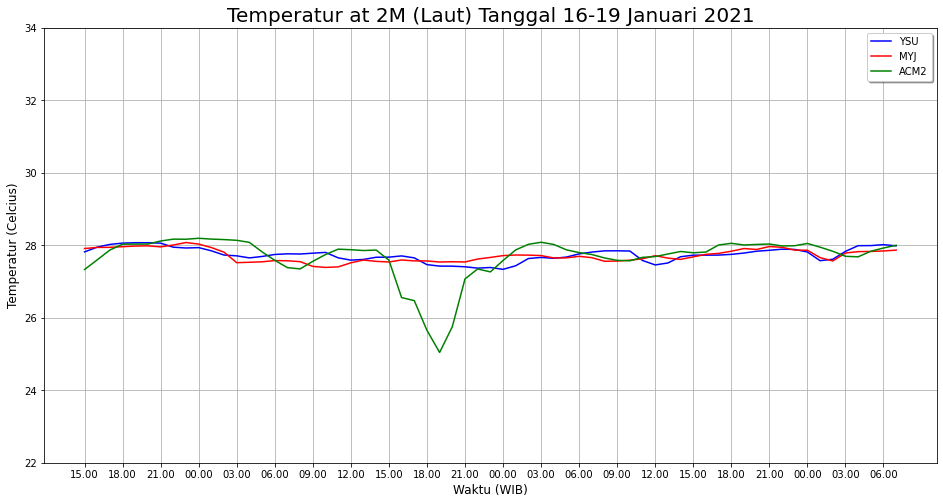

In [ ]:
t1 = file1.variables["T2"][8:73,42,55]-273.15
t2 = file2.variables["T2"][8:73,42,55]-273.15
t3 = file3.variables["T2"][8:73,42,55]-273.15
fig = plt.figure(figsize=(16,8))
plt.plot(t1, color='b', linewidth=1.5)
plt.plot(t2, color='r', linewidth=1.5)
plt.plot(t3, color='g', linewidth=1.5)

plt.title("Temperatur at 2M (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Temperatur (Celcius)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([22,24,26,28,30,32,34])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('Temp-laut')

# Dew Point Temperature

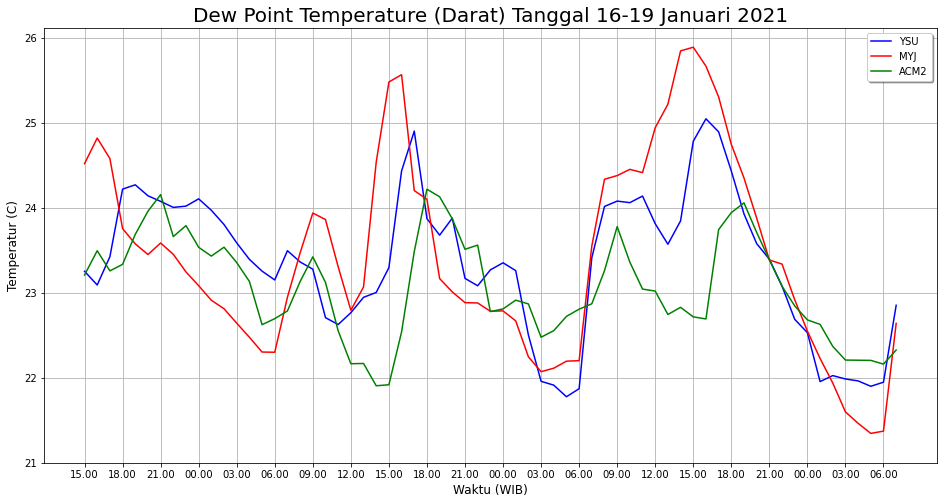

In [ ]:
td1= np.empty((73,1))

for i in range(0,73):
    dew1= np.array(getvar(file1,'td2',timeidx=i))
    td1[i-0,0]=dew1[25,26]

td2= np.empty((73,1))

for i in range(0,73):
    dew2= np.array(getvar(file2,'td2',timeidx=i))
    td2[i-0,0]=dew2[25,26]
    
td3= np.empty((73,1))

for i in range(0,73):
    dew3= np.array(getvar(file3,'td2',timeidx=i))
    td3[i-0,0]=dew3[25,26]
    
TD1=td1[8:73]
TD2=td2[8:73]
TD3=td3[8:73]

fig = plt.figure(figsize=(16,8))
plt.plot(TD1, color='b', linewidth=1.5)
plt.plot(TD2, color='r', linewidth=1.5)
plt.plot(TD3, color='g', linewidth=1.5)


plt.title("Dew Point Temperature (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Temperatur (C)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([21,22,23,24,25,26])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])
plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('TD-Darat')

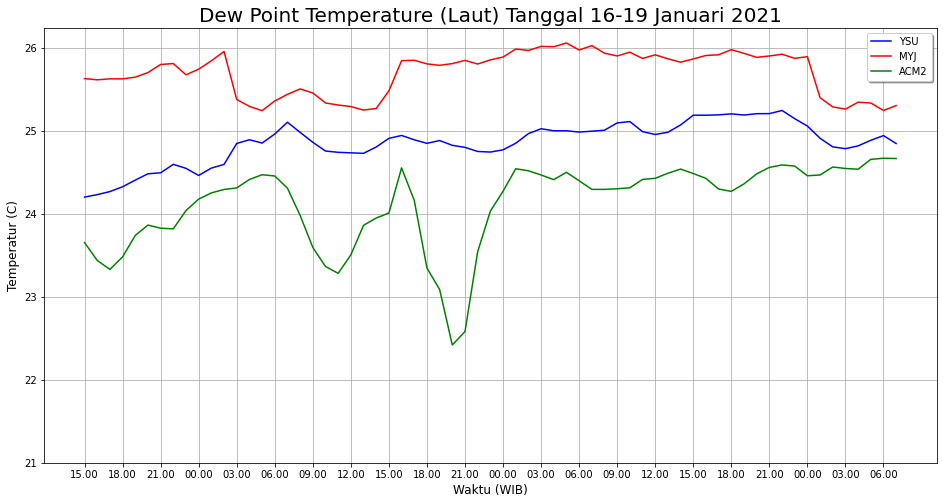

In [ ]:
td1= np.empty((73,1))

for i in range(0,73):
    dew1= np.array(getvar(file1,'td2',timeidx=i))
    td1[i-0,0]=dew1[42,55]

td2= np.empty((73,1))

for i in range(0,73):
    dew2= np.array(getvar(file2,'td2',timeidx=i))
    td2[i-0,0]=dew2[42,55]
    
td3= np.empty((73,1))

for i in range(0,73):
    dew3= np.array(getvar(file3,'td2',timeidx=i))
    td3[i-0,0]=dew3[42,55]
 
TD1=td1[8:73]
TD2=td2[8:73]
TD3=td3[8:73]

fig = plt.figure(figsize=(16,8))
plt.plot(TD1, color='b', linewidth=1.5)
plt.plot(TD2, color='r', linewidth=1.5)
plt.plot(TD3, color='g', linewidth=1.5)


plt.title("Dew Point Temperature (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Temperatur (C)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([21,22,23,24,25,26])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])
plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('TD-Laut')

# QVAPOR

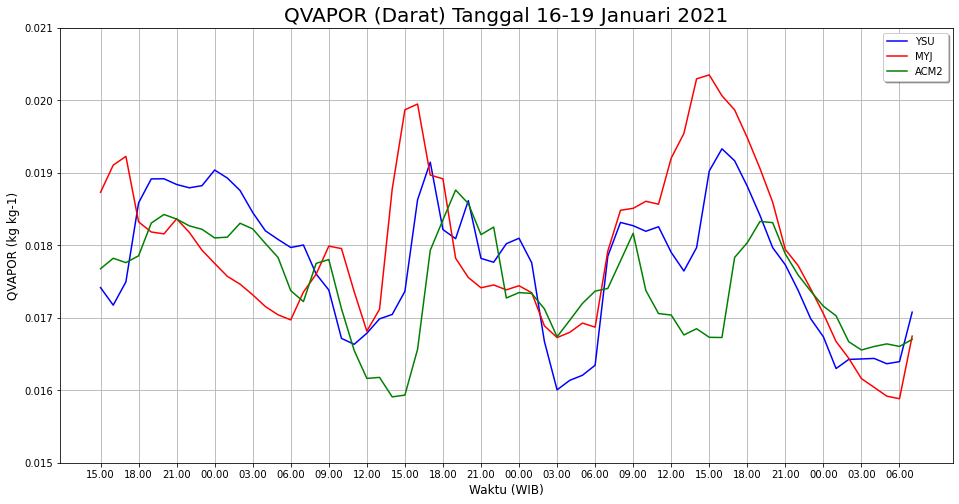

In [ ]:
qv1 = file1.variables["QVAPOR"][8:73,0,25,26]
qv2 = file2.variables["QVAPOR"][8:73,0,25,26]
qv3 = file3.variables["QVAPOR"][8:73,0,25,26]
fig = plt.figure(figsize=(16,8))
plt.plot(qv1, color='b', linewidth=1.5)
plt.plot(qv2, color='r', linewidth=1.5)
plt.plot(qv3, color='g', linewidth=1.5)

plt.title("QVAPOR (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("QVAPOR (kg kg-1)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([00.015,0.016,0.017,0.018,0.019,0.020,0.021])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('QV-darat')

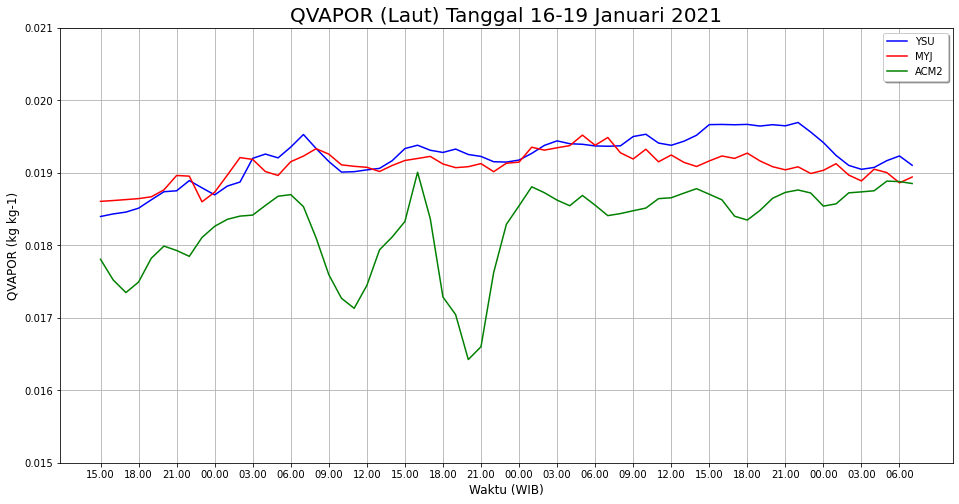

In [ ]:
qv1 = file1.variables["QVAPOR"][8:73,0,42,55]

qv2 = file2.variables["QVAPOR"][8:73,0,42,55]

qv3 = file3.variables["QVAPOR"][8:73,0,42,55]

fig = plt.figure(figsize=(16,8))
plt.plot(qv1, color='b', linewidth=1.5)
plt.plot(qv2, color='r', linewidth=1.5)
plt.plot(qv3, color='g', linewidth=1.5)

plt.title("QVAPOR (Laut) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("QVAPOR (kg kg-1)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([00.015,0.016,0.017,0.018,0.019,0.020,0.021])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63],['15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00','09.00','12.00','15.00','18.00','21.00','00.00','03.00','06.00'])

plt.legend(['YSU', 'MYJ', 'ACM2'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('QV-laut')


# Verifikasi

In [ ]:
import pandas as pd
data = pd.read_excel('Kel 4 - Data Observasi.xlsx', sheet_name='Sheet1')
data

,tanggal,jam,t,td,wib
0,16,9,26.2,24.4,16
1,16,12,26.0,23.0,19
2,16,15,26.2,23.5,22
3,16,18,25.6,22.9,1
4,16,21,25.0,22.7,4
5,17,0,25.7,23.1,7
6,17,3,29.3,23.5,10
7,17,6,31.3,24.4,13
8,17,9,27.0,24.2,16
9,17,12,25.2,24.2,19


In [ ]:
t=data['t']
td=data['td']

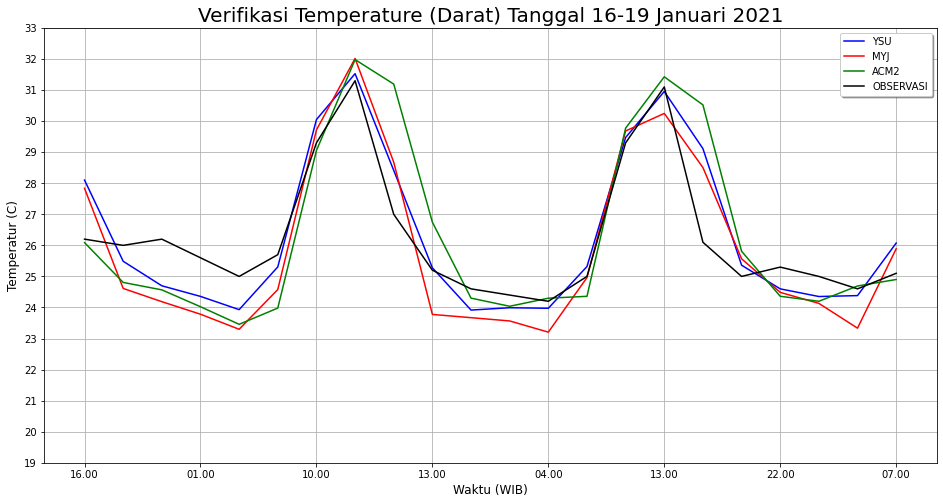

In [ ]:
temp1 = file1.variables["T2"][9:73:3,25,26]-273.15
temp2 = file2.variables["T2"][9:73:3,25,26]-273.15
temp3 = file3.variables["T2"][9:73:3,25,26]-273.15
fig = plt.figure(figsize=(16,8))
plt.plot(temp1, color='b', linewidth=1.5)
plt.plot(temp2, color='r', linewidth=1.5)
plt.plot(temp3, color='g', linewidth=1.5)
plt.plot(t, color='black', linewidth=1.5)

plt.title("Verifikasi Temperature (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Temperatur (C)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([19,20,21,22,23,24,25,26,27,28,29,30,31,32,33])
plt.xticks([0,3,6,9,12,15,18,21],['16.00','01.00','10.00','13.00','04.00','13.00','22.00','07.00'])
plt.legend(['YSU', 'MYJ', 'ACM2', 'OBSERVASI'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('Ver-Temp-Darat')

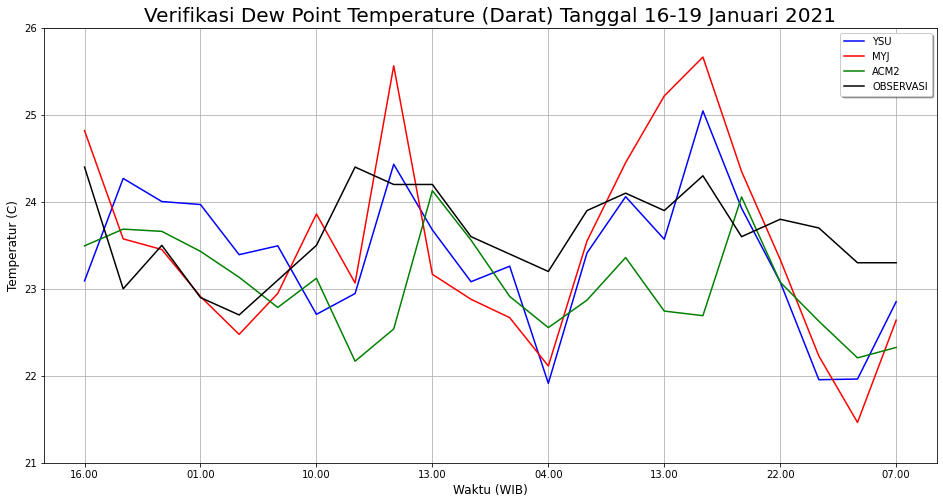

In [ ]:
td1= np.empty((73,1))

for i in range(0,73):
    dew1= np.array(getvar(file1,'td2',timeidx=i))
    td1[i-0,0]=dew1[25,26]

td2= np.empty((73,1))

for i in range(0,73):
    dew2= np.array(getvar(file2,'td2',timeidx=i))
    td2[i-0,0]=dew2[25,26]
    
td3= np.empty((73,1))

for i in range(0,73):
    dew3= np.array(getvar(file3,'td2',timeidx=i))
    td3[i-0,0]=dew3[25,26]
    
TD1=td1[9:73:3]
TD2=td2[9:73:3]
TD3=td3[9:73:3]

fig = plt.figure(figsize=(16,8))
plt.plot(TD1, color='b', linewidth=1.5)
plt.plot(TD2, color='r', linewidth=1.5)
plt.plot(TD3, color='g', linewidth=1.5)
plt.plot(td, color='black', linewidth=1.5)

plt.title("Verifikasi Dew Point Temperature (Darat) Tanggal 16-19 Januari 2021", fontsize='20')
plt.ylabel("Temperatur (C)", fontsize='12')
plt.xlabel("Waktu (WIB)", fontsize='12')
plt.yticks([21,22,23,24,25,26])
plt.xticks([0,3,6,9,12,15,18,21],['16.00','01.00','10.00','13.00','04.00','13.00','22.00','07.00'])
plt.legend(['YSU', 'MYJ', 'ACM2', 'OBSERVASI'], loc=1, prop={'size':10}, shadow=True)

plt.grid(True)
plt.show()
fig.savefig('Ver-TD-Darat')

In [ ]:
temp1

masked_array(data=[28.10196 , 25.487762, 24.698273, 24.356873, 23.930908,
                   25.305756, 30.0484  , 31.527222, 28.412964, 25.276764,
                   23.916687, 23.992126, 23.974548, 25.31894 , 29.472198,
                   30.954742, 29.114136, 25.361664, 24.5997  , 24.353119,
                   24.382385, 26.073029],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
temp2

masked_array(data=[27.83612 , 24.613312, 24.18695 , 23.783539, 23.29831 ,
                   24.57779 , 29.715363, 32.01767 , 28.67685 , 23.776276,
                   23.671875, 23.56665 , 23.206268, 24.963013, 29.682465,
                   30.247498, 28.504913, 25.567383, 24.486603, 24.13208 ,
                   23.334412, 25.8891  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
temp3

masked_array(data=[26.088257, 24.806519, 24.567383, 24.024078, 23.458008,
                   23.980835, 29.053741, 31.980225, 31.191711, 26.746826,
                   24.300842, 24.038849, 24.299255, 24.35965 , 29.773743,
                   31.426514, 30.52243 , 25.809204, 24.360779, 24.19983 ,
                   24.691772, 24.90097 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
TD1

array([[23.09114647],
       [24.26954079],
       [24.00375938],
       [23.96957207],
       [23.39292336],
       [23.49450874],
       [22.70694351],
       [22.94612694],
       [24.43244743],
       [23.67726517],
       [23.08213234],
       [23.26038933],
       [21.913414  ],
       [23.41206741],
       [24.05950546],
       [23.57020187],
       [25.04587173],
       [23.92710304],
       [23.07868767],
       [21.95525742],
       [21.96302986],
       [22.8523674 ]])

In [ ]:
TD2

array([[24.81931496],
       [23.57452011],
       [23.45195961],
       [22.91168022],
       [22.476614  ],
       [22.9480896 ],
       [23.86075974],
       [23.06755066],
       [25.56437492],
       [23.16714668],
       [22.87986565],
       [22.66921806],
       [22.11274147],
       [23.54878616],
       [24.45123482],
       [25.21776199],
       [25.66523552],
       [24.34941101],
       [23.33722687],
       [22.22730827],
       [21.46424294],
       [22.63993263]])

In [ ]:
TD3=td3[9:73:3]
TD3

array([[23.49444389],
       [23.68659973],
       [23.66089249],
       [23.43105698],
       [23.13303375],
       [22.78603554],
       [23.12150764],
       [22.16798401],
       [22.53881454],
       [24.12895775],
       [23.560215  ],
       [22.91290855],
       [22.55412292],
       [22.87010193],
       [23.36005783],
       [22.74418831],
       [22.69176674],
       [24.05703735],
       [23.07644844],
       [22.62776566],
       [22.20637321],
       [22.32633781]])